<a href="https://colab.research.google.com/github/sreekarannaluru/Wildfire-Competition/blob/main/NN_C_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, datasets
from sklearn import preprocessing
from keras.optimizers import Adam

In [ ]:
df_c = pd.read_excel("/content/Columbus.xlsx")

In [ ]:
del df_c["severerisk"]

In [ ]:
# Normalize the variables
df_c = (df_c - df_c.min())/(df_c.max() - df_c.min())

##### Important Variables:  Dust + SoilMoisture + WindVelocity + Transpire + confidence + humidity + precipprob + snowdepth + sealevelpressure + cloudcover + moonphase

In [ ]:
# Use columbus data as test data.
df_d = pd.read_excel("/content/Denver.xlsx")

In [ ]:
del df_d["severerisk"]

In [ ]:
# Normalize the variables
df_d = (df_d - df_d.min())/(df_d.max() - df_d.min())

In [ ]:
X = df_c.loc[:,['Dust', 'SoilMoisture', 'WindVelocity', 'humidity','precipprob', 'brightness',
                'snowdepth' , 'sealevelpressure', 'visibility', 'cloudcover', 'moonphase']].values
y = df_c.iloc[:,15].values

In [ ]:
X_t = df_d.loc[:,[ 'Dust', 'SoilMoisture', 'WindVelocity',  'humidity','precipprob', 'brightness',
                'snowdepth' , 'sealevelpressure', 'visibility', 'cloudcover', 'moonphase']].values
y_t = df_d.iloc[:,15].values

In [ ]:
# Create a sequential model
model = models.Sequential()

# Add the input layer with the specified number of features
model.add(layers.Dense(32, input_dim= X.shape[1], activation='relu'))

# Add one or more hidden layers
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

# Add the output layer with a single neuron (since this is a regression problem)
model.add(layers.Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X, y, epochs=25, batch_size=32, validation_data=(X_t, y_t))

Epoch 1/25
4/4 [==============================] - 1s 60ms/step - loss: 0.7606 - mean_absolute_error: 0.8452 - val_loss: 0.8151 - val_mean_absolute_error: 0.8860
Epoch 2/25
4/4 [==============================] - 0s 13ms/step - loss: 0.5931 - mean_absolute_error: 0.7399 - val_loss: 0.6779 - val_mean_absolute_error: 0.8047
Epoch 3/25
4/4 [==============================] - 0s 15ms/step - loss: 0.4675 - mean_absolute_error: 0.6496 - val_loss: 0.5689 - val_mean_absolute_error: 0.7345
Epoch 4/25
4/4 [==============================] - 0s 21ms/step - loss: 0.3674 - mean_absolute_error: 0.5682 - val_loss: 0.4782 - val_mean_absolute_error: 0.6715
Epoch 5/25
4/4 [==============================] - 0s 20ms/step - loss: 0.2888 - mean_absolute_error: 0.4953 - val_loss: 0.4059 - val_mean_absolute_error: 0.6171
Epoch 6/25
4/4 [==============================] - 0s 18ms/step - loss: 0.2280 - mean_absolute_error: 0.4321 - val_loss: 0.3555 - val_mean_absolute_error: 0.5763
Epoch 7/25
4/4 [==================

In [ ]:
# Evaluate the model on test data
# Reverse normalizing the output. 26 is the difference between maximum and minimum value of brightness.
test_loss, test_err = model.evaluate(X_t, y_t, verbose=2)
print('Mean Squared Error:',  math.sqrt(test_loss*108)*26)
print('Mean Absolute Error:', 26*test_err)

4/4 - 0s - loss: 0.1037 - mean_absolute_error: 0.2964 - 27ms/epoch - 7ms/step
Mean Squared Error: 87.02216471535715
Mean Absolute Error: 7.706318914890289


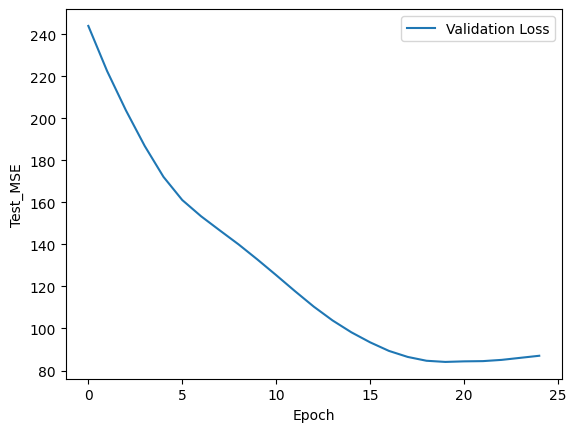

In [ ]:
#Automatically capturing losses from each epoch
val_loss = history.history['val_loss']

for i in range(0, len(val_loss)):
  val_loss[i] = (math.sqrt((val_loss[i])*108)*26)


#Plot the loses
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Test_MSE')
plt.legend()
plt.show()

### Future work and recommendations.

##### 1) NN is a great tool in understanding wildfire and we want to improve our model.
##### 2) Adding more variables and improving test accuracy.
##### 3) Integrating these results in dashboard which is easy to explain.
##### 4) Consulting experts in the domain to built robust models.
##### 5) Integration with GIS systems
##### 6) Closing following the work being done by people in academia and startups in this space.